# A distorted level-set function contour 
## As a benchmark test for Hamilton-Jacobi based re-initialization ##


- [Reference Paper](https://ac.els-cdn.com/S0021999100965537/1-s2.0-S0021999100965537-main.pdf?_tid=56e723c8-0550-11e8-aee1-00000aacb361&acdnat=1517270505_b3d62f4625e2f8e88b1baae52b74fde2) by Russo and Smereka Journal of Computational Physics 163, 51–67 (2000)

In [1]:
import numpy as np
from pylab import figure, axes, pie, title, show
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import math

In [2]:
# function for creating level-set function contours
#
def phiFunc(X,Y,x0,y0,eps,A,B, distort):
    phi = np.sqrt(np.power((X),2)/A**2 + np.power((Y),2)/B**2)-1
    distFunc = eps + np.power((X-x0),2) + np.power((Y-y0),2)
    ret = phi * (1-distort) + phi * distFunc * distort
    
    return ret

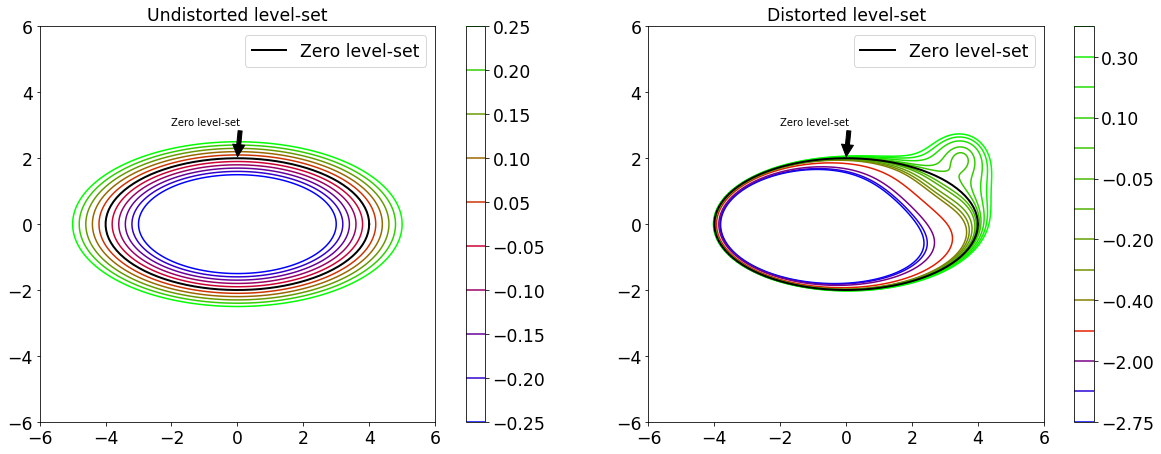

In [4]:
# Reference paper: A Remark on Computing Distance Functions Giovanni Russo¤ and Peter Smereka - 2000
#
X,Y= np.meshgrid(np.arange(-5.5,5.5,0.01),np.arange(-5.5,5.5,0.01))
[x0,y0,eps,A,B] = [3.5,2,0.1,4,2] #parameters to perturb an ellipsoidal distance function
#
plt.figure(figsize=(20, 16))
params = {'legend.fontsize': 'xx-large', 'axes.labelsize': 'xx-large', 'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large', 'ytick.labelsize':'xx-large'}
#
# subplot1: Undistorted ellipsoida distance function 
#
plt.subplot(221)
distort = 0
phiVal=phiFunc(X,Y,x0,y0,eps,A,B,distort)
levels = [-0.25,-0.2,-0.15,-0.1,-0.05,0.05,0.1,0.15,0.2,0.25]
plt.contour(X, Y, phiVal, levels, cmap=plt.cm.brg)
plt.colorbar() 
t = np.linspace(0, 2*3.1415, 100)
line = plt.plot(0+A*np.cos(t), 0+B*np.sin(t))
plt.setp(line, linewidth=2, color='k', linestyle='-')
plt.legend(['Zero level-set'])
plt.annotate('Zero level-set', xy=(0, 2), xytext=(-2, 3), arrowprops=dict(facecolor='black', shrink=0.05))
plt.title('Undistorted level-set')
plt.axis('square')
plt.gca().set_xlim([-6,6])
plt.gca().set_ylim([-6,6])

#
# subplot2: Distorted ellipsoida distance function 
#
plt.subplot(222)
distort = 1
phiVal=phiFunc(X,Y,x0,y0,eps,A,B,distort)
levels = [-2.75,-2.5,-2,-1,-0.4,-0.3,-0.2,-0.1,-0.05,0.05,0.1,0.2,0.3,0.4]
plt.contour(X, Y, phiVal, levels, cmap=plt.cm.brg)
plt.colorbar() 
t = np.linspace(0, 2*3.1415, 100)
line = plt.plot(0+A*np.cos(t), 0+B*np.sin(t))
plt.setp(line, linewidth=2, color='k', linestyle='-')
plt.legend(['Zero level-set'])
plt.annotate('Zero level-set', xy=(0, 2), xytext=(-2, 3), arrowprops=dict(facecolor='black', shrink=0.05))
plt.title('Distorted level-set')
plt.axis('square')   
plt.gca().set_xlim([-6,6])
plt.gca().set_ylim([-6,6])
pylab.rcParams.update(params)
# 
plt.savefig('levelSet_Contours.pdf')
plt.show()
#